# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata,
                        how='inner', on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
number_of_mice = len(combined_data_df.groupby('Mouse ID').count())
print(f'number of mice: {number_of_mice}')


number of mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data= combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data_df.drop_duplicates(keep= False)

In [8]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_data.groupby('Mouse ID').count())
print(number_of_mice)

249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumorvolume_mean = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumorvolume_median = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumorvolume_var = clean_data.groupby([ 'Drug Regimen'])['Tumor Volume (mm3)'].var()
tumorvolume_std = clean_data.groupby([ 'Drug Regimen'])['Tumor Volume (mm3)'].std()
tumorvolume_sem = clean_data.groupby([ 'Drug Regimen'])['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
results_df = pd.DataFrame({'Mean Tumor Volume': tumorvolume_mean,
                          'Median Tumor Volume': tumorvolume_median,
                          'Tumor Volume Variance': tumorvolume_var,
                          'Tumor Volume Std. Dev.': tumorvolume_std,
                          'Tumor Volume Std. Err.': tumorvolume_sem})

results_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_summary_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0.5, 1.0, 'Mouse ID/Timepoints for each drug regimen ')

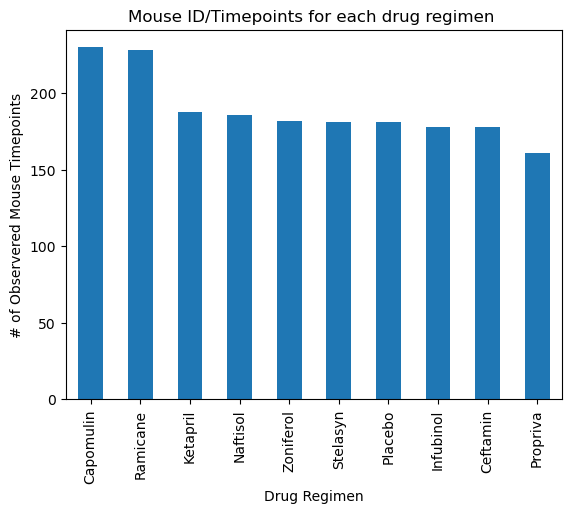

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = combined_data_df['Drug Regimen'].value_counts().plot.bar()

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observered Mouse Timepoints")
bar_plot.set_title("Mouse ID/Timepoints for each drug regimen ")

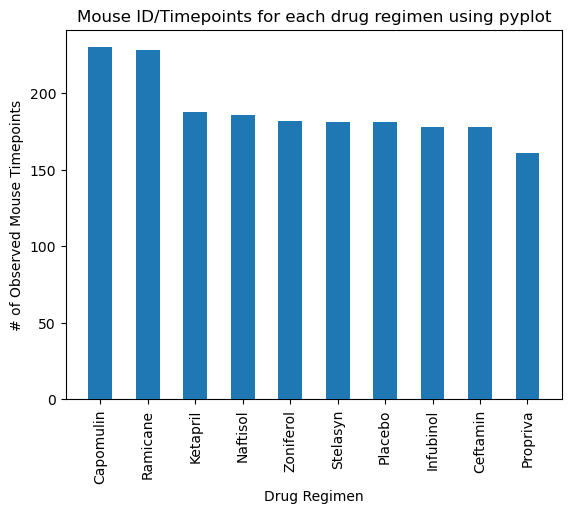

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data_count = combined_data_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(data_count))
plt.bar(x_axis, data_count, width = 0.5, zorder=3)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, data_count.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse ID/Timepoints for each drug regimen using pyplot")
plt.show()

Text(0.5, 1.0, 'distribution of female versus male mice')

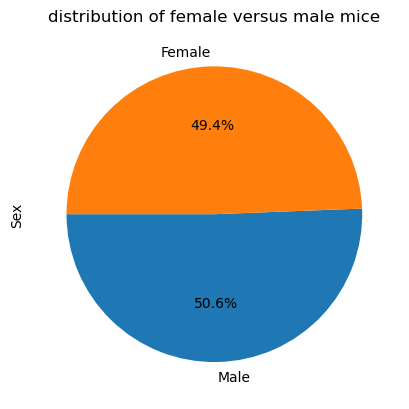

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distrib = combined_data_df['Sex'].value_counts()
pie_plot = sex_distrib.plot.pie(autopct="%1.1f%%", startangle=180)
pie_plot.set_ylabel('Sex')
pie_plot.set_title('distribution of female versus male mice')


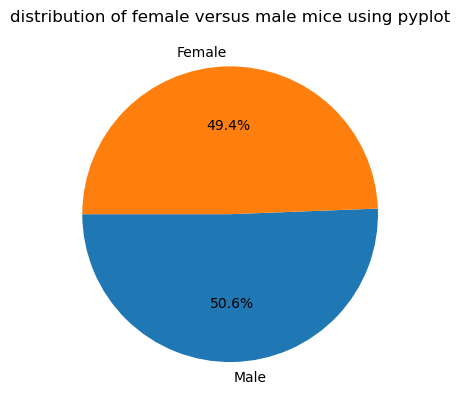

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distrib = combined_data_df['Sex'].value_counts()
plt.pie(sex_distrib, labels=sex_distrib.index.values, autopct="%1.1f%%", startangle=180)
plt.title('distribution of female versus male mice using pyplot')
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

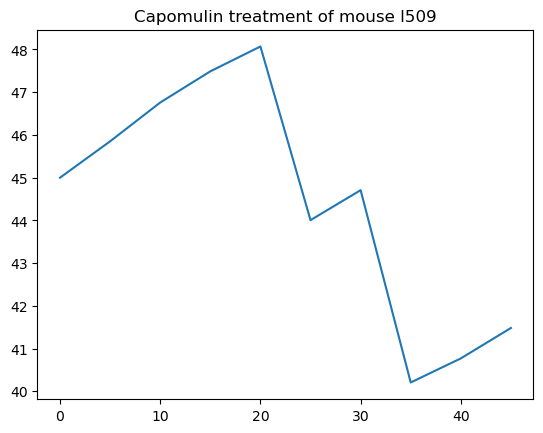

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomol_mouse = combined_data_df.loc[combined_data_df['Mouse ID'] == 'l509']
plt.plot(capomol_mouse['Timepoint'], capomol_mouse['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")


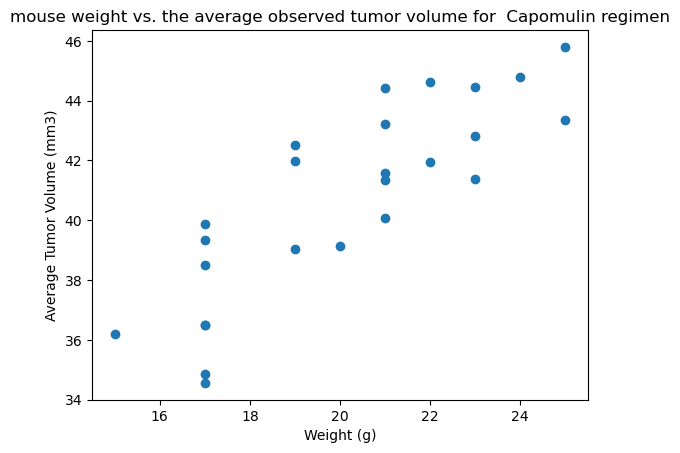

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})


avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("mouse weight vs. the average observed tumor volume for  Capomulin regimen")

plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})


avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

linregress == (slope, intercept, rvalue, pvalue, stderr)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(20,37),fontsize=15,color="red")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('mouse weight and average observed tumor volume for the entire Capomulin regimen')
plt.show()

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


NameError: name 'linregress' is not defined